In [1]:
import anndata
import scanpy as sc
import numpy as np
import pandas as pd

from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt


In [2]:
path = "./rand1/"

In [3]:
# gene (600) by cell (2000) matrix 
count = pd.read_csv(path + "counts.txt", sep = "\t", header = None).values

# cell_label
cell_labels = pd.read_csv(path + "cell_labels.txt", sep = "\t")

In [4]:
adata = anndata.AnnData(X = count.T, obs = cell_labels)

/storage/home/hhive1/zzhang834/.conda/envs/my-pytorch/lib/python3.8/site-packages/anndata/_core/anndata.py:119: ImplicitModificationWarning: Transforming to str index.
  warnings.warn("Transforming to str index.", ImplicitModificationWarning)


In [5]:
sc.pp.normalize_per_cell(adata)
sc.pp.log1p(adata)

/storage/home/hhive1/zzhang834/.conda/envs/my-pytorch/lib/python3.8/site-packages/anndata/_core/anndata.py:1094: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
  if not is_categorical(df_full[k]):


In [7]:
pca_op = PCA(n_components = 30)
X_pca = pca_op.fit_transform(adata.X)

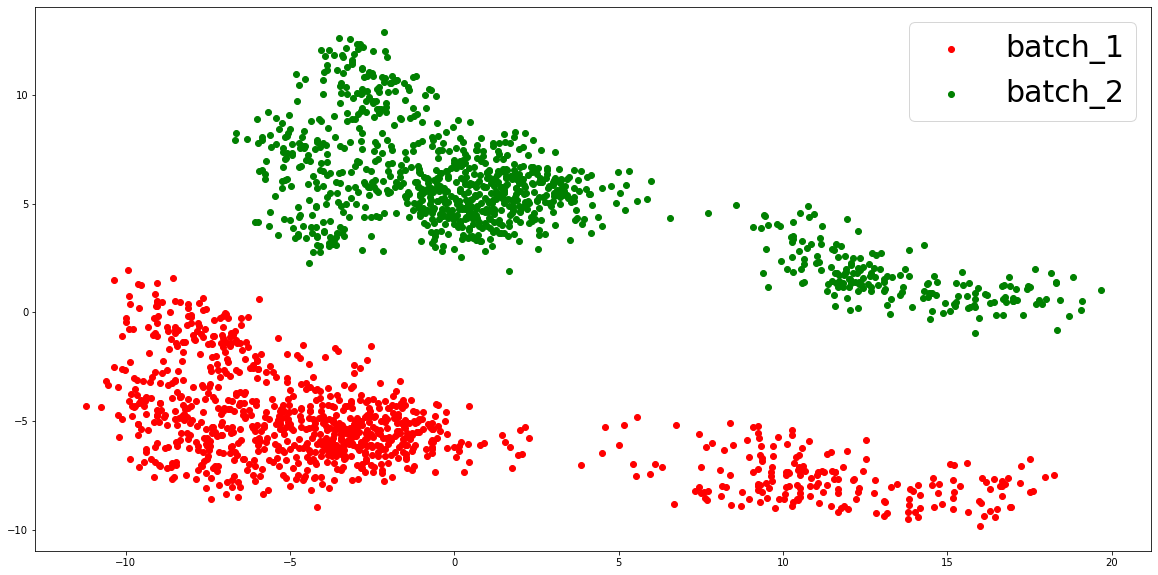

In [23]:
fig = plt.figure(figsize = (20,10))
ax = fig.add_subplot()
batch1 = cell_labels.loc[cell_labels["batch"] == 1].index.values
batch2 = cell_labels.loc[cell_labels["batch"] == 2].index.values
ax.scatter(X_pca[batch1,0], X_pca[batch1,1], color = "red", label = "batch_1")
ax.scatter(X_pca[batch2,0], X_pca[batch2,1], color = "green", label = "batch_2")
ax.legend(fontsize = 30)

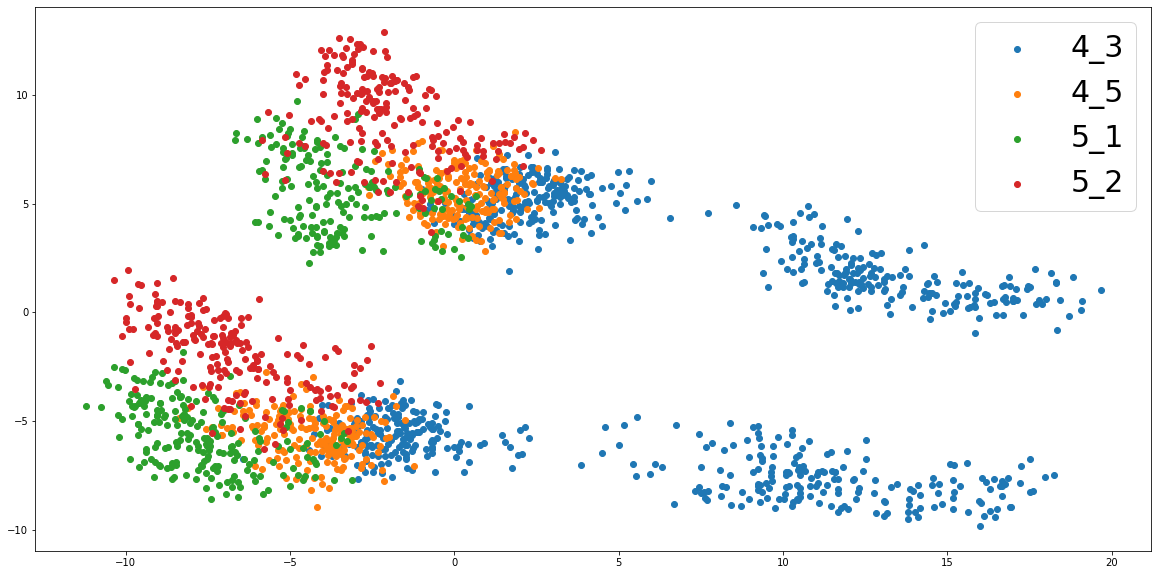

In [35]:
fig = plt.figure(figsize = (20,10))
ax = fig.add_subplot()

for idx, bb in enumerate(np.unique(cell_labels["pop"].values)):
    bb_indx = cell_labels.loc[cell_labels["pop"] == bb].index.values
    ax.scatter(X_pca[bb_indx,0], X_pca[bb_indx,1], cmap = "Paired", label = bb)

ax.legend(fontsize = 30)
    
